In [4]:
import sys
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/ness/Projects/DataSources/2008.csv")

In [5]:
df = df.dropna(subset=["ArrDelay"])
df = df.sample(frac=1).head(100800)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [6]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)
print("coefficients: ", regr.coef_)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

coefficients:  [1.01699657]
R cuadrado:  0.8741919529841989


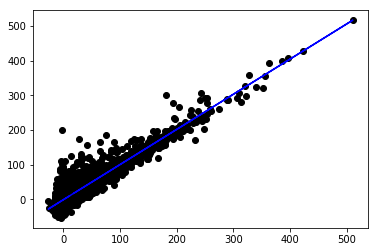

In [8]:
plt.scatter(X[1:10000], Y[1:10000], color='black')
plt.plot(X[1:10000], Y_pred[1:10000], color='Blue')

In [9]:
# quantitative variables
X =df[['AirTime', 'Distance', 'TaxiIn', 'TaxiOut']]
# categorical variables
df["Month"] = df["Month"].apply(str)
df["DayofMonth"] = df["DayofMonth"].apply(str)
df["DayOfWeek"] = df["DayOfWeek"].apply(str)

dummies = pd.get_dummies(data=df[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest']])
X = dummies.add(X, fill_value=0)
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_WYS', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=646)

In [10]:
#perform linear regression with new variables
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.17246854732611794


In [11]:
#Add the column with the delay departure
X= X.add(df[["DepDelay"]], fill_value=0)
#Try again
regr = linear_model.LinearRegression()
regr.fit(X,Y)
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.9726916235675855
